# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):                           
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | fort bragg
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | mont-tremblant
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | jinsha
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | riachao das neves
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | holualoa
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | sultanah
Processing Record 17 of Set 1 | lata
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | tolanaro
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | isle of lewis
City not found. Skipping...
Processing Recor

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.37,91,100,17.12,TF,1715303885
1,fort bragg,35.1390,-79.0060,23.08,82,0,4.12,US,1715303885
2,adamstown,-25.0660,-130.1015,22.29,76,99,4.79,PN,1715303794
3,mont-tremblant,46.1949,-74.6264,7.98,87,73,0.51,CA,1715303837
4,invercargill,-46.4000,168.3500,9.45,77,100,5.36,NZ,1715303887


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.37,91,100,17.12,TF,1715303885
1,fort bragg,35.1390,-79.0060,23.08,82,0,4.12,US,1715303885
2,adamstown,-25.0660,-130.1015,22.29,76,99,4.79,PN,1715303794
3,mont-tremblant,46.1949,-74.6264,7.98,87,73,0.51,CA,1715303837
4,invercargill,-46.4000,168.3500,9.45,77,100,5.36,NZ,1715303887


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

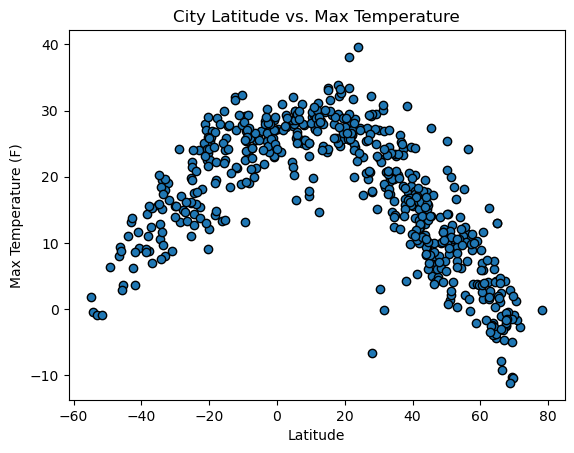

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

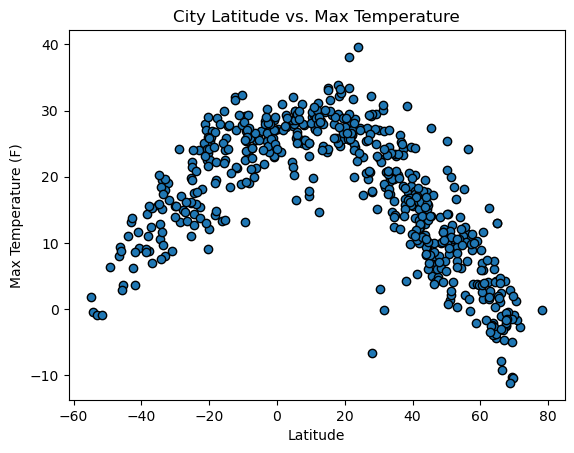

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

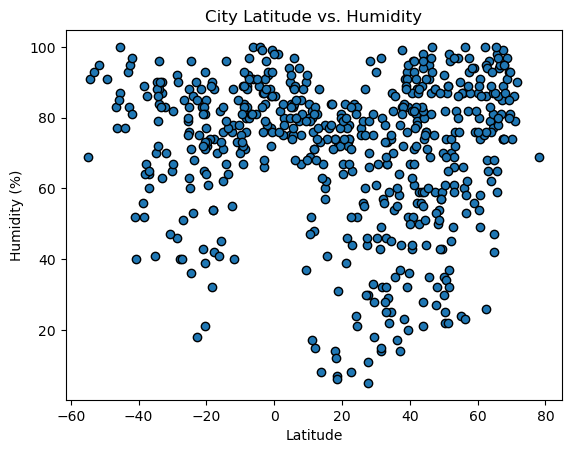

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

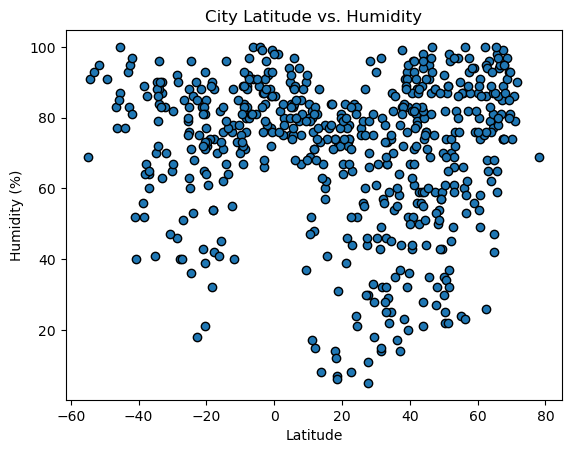

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

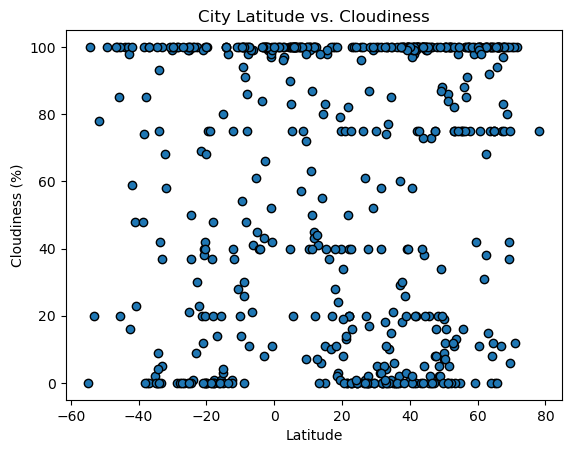

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

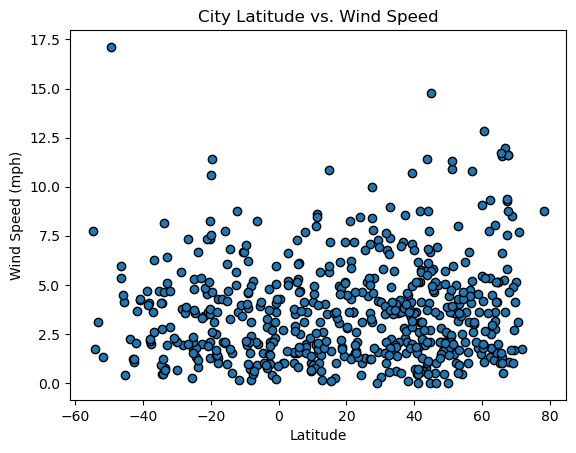

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots

#x_values = san_diego_housing['AveRooms']
#y_values = san_diego_housing['MEDV']

def linear_regression(x_values, y_values, title, y_label, coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, coords,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is:{rvalue**2}")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fort bragg,35.1390,-79.0060,23.08,82,0,4.12,US,1715303885
3,mont-tremblant,46.1949,-74.6264,7.98,87,73,0.51,CA,1715303837
5,jinsha,32.0898,121.0735,20.65,57,0,6.79,CN,1715303887
7,longyearbyen,78.2186,15.6401,-0.09,69,75,8.75,SJ,1715303888
10,tiksi,71.6872,128.8694,-2.73,90,100,1.72,RU,1715303890


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.37,91,100,17.12,TF,1715303885
2,adamstown,-25.0660,-130.1015,22.29,76,99,4.79,PN,1715303794
4,invercargill,-46.4000,168.3500,9.45,77,100,5.36,NZ,1715303887
6,lebu,-37.6167,-73.6500,8.81,86,0,2.00,CL,1715303888
8,riachao das neves,-11.7461,-44.9100,21.33,40,37,0.17,BR,1715303889


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.7348624718818142


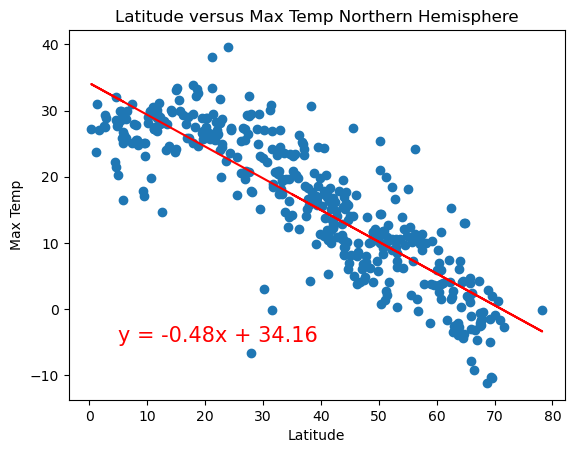

In [24]:
# Linear regression on Northern Hemisphere
n_x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df['Max Temp']


linear_regression(n_x_values, y_values, "Latitude versus Max Temp Northern Hemisphere", "Max Temp", (5,-5))

The r-value is:0.6703562395865924


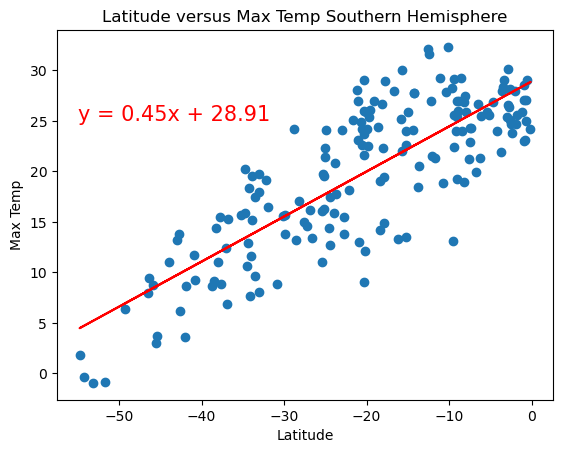

In [26]:
# Linear regression on Southern Hemisphere
s_x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df['Max Temp']


linear_regression(s_x_values, y_values, "Latitude versus Max Temp Southern Hemisphere", "Max Temp", (-55,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.012799613646501031


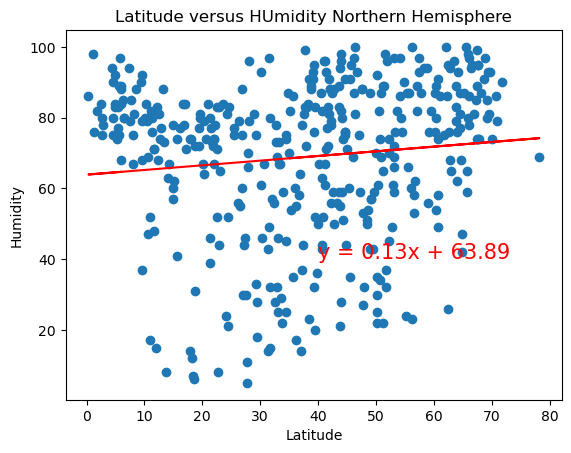

In [27]:
# Northern Hemisphere
y_values= northern_hemi_df['Humidity']


linear_regression(n_x_values, y_values, "Latitude versus HUmidity Northern Hemisphere", "Humidity", (40,40))

The r-value is:0.01399192753345325


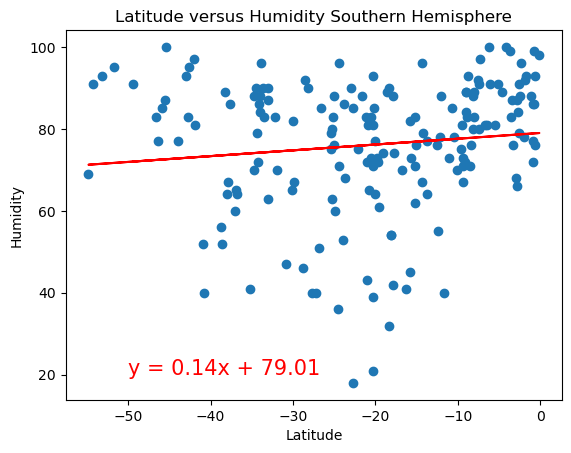

In [29]:
# Southern Hemisphere
y_values= southern_hemi_df['Humidity']


linear_regression(s_x_values, y_values, "Latitude versus Humidity Southern Hemisphere", "Humidity", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.00346767123376852


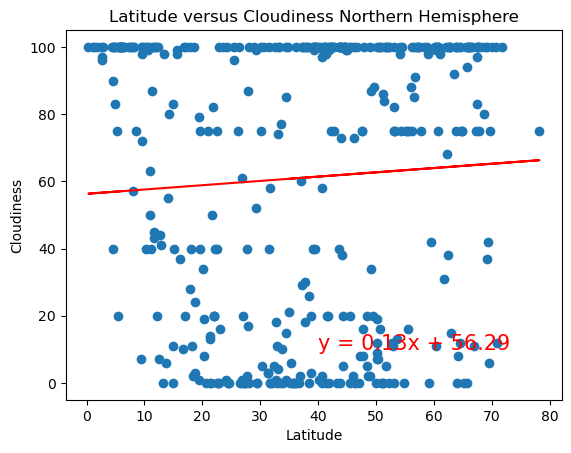

In [28]:
# Northern Hemisphere
y_values= northern_hemi_df['Cloudiness']


linear_regression(n_x_values, y_values, "Latitude versus Cloudiness Northern Hemisphere", "Cloudiness", (40,10))

The r-value is:0.013163016670431951


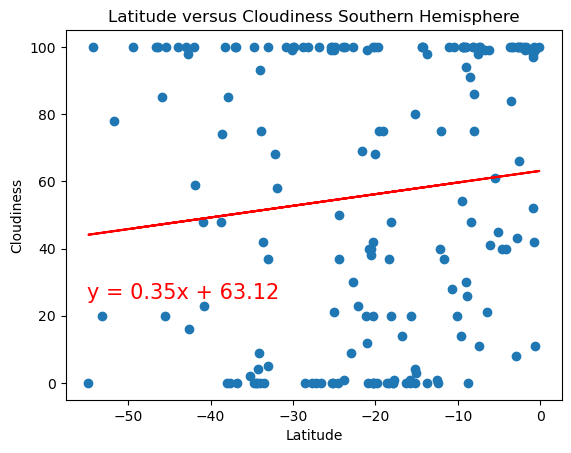

In [30]:
# Southern Hemisphere
y_values= southern_hemi_df['Cloudiness']


linear_regression(s_x_values, y_values, "Latitude versus Cloudiness Southern Hemisphere", "Cloudiness", (-55,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.015928809008765542


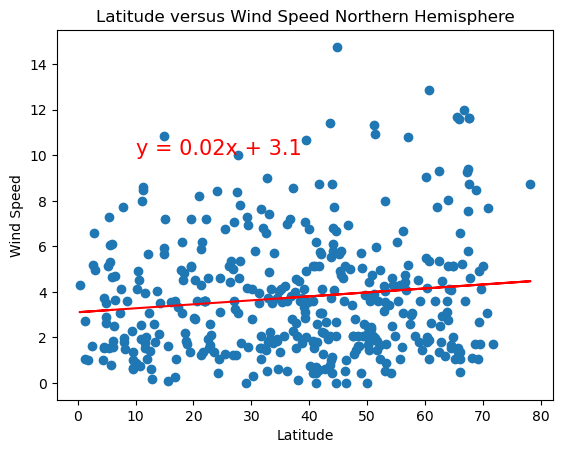

In [31]:
# Northern Hemisphere
y_values= northern_hemi_df['Wind Speed']


linear_regression(n_x_values, y_values, "Latitude versus Wind Speed Northern Hemisphere", "Wind Speed", (10,10))

The r-value is:0.014988976943654796


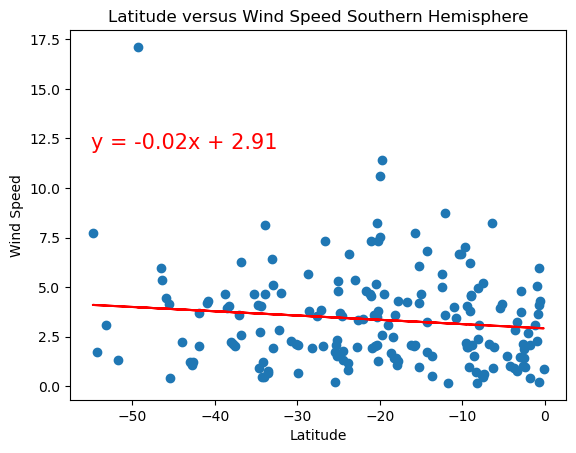

In [32]:
# Southern Hemisphere
y_values= southern_hemi_df['Wind Speed']


linear_regression(s_x_values, y_values, "Latitude versus Wind Speed Southern Hemisphere", "Wind Speed", (-55,12))

**Discussion about the linear relationship:** 
For Temperture versus Latitude the r value indicates a moderately strong positive correlation. Both Northern and Southern hemispheres show similar trends: temperatures generally decrease as you move away from the equator towards the respective poles.

For all others Humidity, Cloudiness and Wind Spped versus Latitude, the respective r values show weal variables. There is a consistent finding across both hemispheres: latitude alone is not a good predictor of these atmospheric conditions.



